<a href="https://colab.research.google.com/github/pjavier1988/machine-learning/blob/master/FuncionesActivacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de activación

In [0]:
!wget "https://github.com/pjavier1988/machine-learning/blob/master/neural-networks/funciones_activacion.png"

--2020-03-29 00:56:41--  https://github.com/pjavier1988/machine-learning/blob/master/neural-networks/funciones_activacion.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘funciones_activacion.png’

funciones_activacio     [ <=>                ]  66.12K  --.-KB/s    in 0.03s   

2020-03-29 00:56:46 (2.52 MB/s) - ‘funciones_activacion.png’ saved [67708]



In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from io import BytesIO
from PIL import Image
from google.colab import files
tf.compat.v1.disable_eager_execution()

In [23]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['funciones_activacion.png']))

Saving funciones_activacion.png to funciones_activacion.png


![picture](https://drive.google.com/uc?id=1mOBKcy4v64lB3NGeUEC9WCtxe1RiaJge)

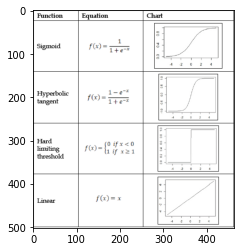

In [12]:
session = tf.compat.v1.Session()
tf.compat.v1.set_random_seed(2019)
np.random.seed(2019)



batch_size = 50
a1 = tf.Variable(tf.random.normal(shape=[1,1]))
b1 = tf.Variable(tf.random.normal(shape=[1,1]))

a2 = tf.Variable(tf.random.normal(shape=[1,1]))
b2 = tf.Variable(tf.random.normal(shape=[1,1]))

x = np.random.normal(loc=5,scale=0.25, size=1000)
x_data = tf.compat.v1.placeholder(shape=[None, 1], dtype= tf.float32)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
sigmoid_act = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

In [0]:
relu_act = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [0]:
target = 1.5
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_act, target)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_act, target)))

In [0]:
my_optim = tf.compat.v1.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_optim.minimize(loss1)
train_step_relu = my_optim.minimize(loss2)
init = tf.compat.v1.global_variables_initializer()
session.run(init)

In [0]:
loss_vect_sigmoid = []
loss_vect_relu = []
activ_sigmoid = []
activ_relu = []
for i in range(1000):
    rand_idx = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_idx]])
    session.run(train_step_sigmoid, feed_dict = {x_data:x_vals})
    session.run(train_step_relu, feed_dict={x_data:x_vals})
    
    loss_vect_sigmoid.append(session.run(loss1, feed_dict={x_data:x_vals}))
    loss_vect_relu.append(session.run(loss2, feed_dict={x_data:x_vals}))
    
    activ_sigmoid.append(np.mean(session.run(sigmoid_act, feed_dict={x_data:x_vals})))
    activ_relu.append(np.mean(session.run(relu_act, feed_dict={x_data:x_vals})))

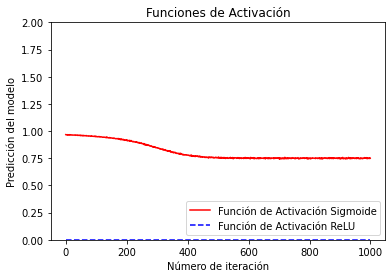

In [21]:
plt.plot(activ_sigmoid, 'r-', label="Función de Activación Sigmoide")
plt.plot(activ_relu, 'b--', label="Función de Activación ReLU")
plt.ylim([0.0,2.0])
plt.title("Funciones de Activación")
plt.xlabel("Número de iteración")
plt.ylabel("Predicción del modelo")
plt.legend(loc="lower right")
plt.show()